# **Random Forest Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 27/11/2022*

---

## **Importing data**

In [1]:
# RUN ONLY FOR GOOGLE COLAB

# from google.colab import drive

# drive.mount("path")  

# %cd "path"

In [1]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from joblib import dump
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
smote = False

In [3]:
# Obtaining the train and test dataset

x_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.csv')
y_test = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.csv')

In [4]:
if smote:
    x_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/x_train.csv')
    y_train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/y_train.csv')
else:    
    # Dividing the train dataset
    train = pd.read_csv('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/train/original_train.csv')
    x_train = train.drop(['Churn'], axis=1)
    y_train = pd.DataFrame(train['Churn'])

In [16]:
random_forest = RandomForestClassifier(max_depth=10, criterion='entropy', random_state=0, max_features='log2')

# fit the model with data
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

C:\Users\myros\AppData\Local\Temp\ipykernel_6116\2545543798.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


In [17]:
print("Score:")
print(random_forest.score(x_test, y_test))

Score:
0.790719696969697


In [18]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [19]:
#Evaluataion of the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
acc = round(accuracy(cm),2)
percentage = "{:.0%}".format(acc)
print(f"Accuracy of Model: {percentage}")

Accuracy of Model: 79%


In [20]:
# Confussion Matrix
pd.DataFrame(cm)

,0,1
0,1412,303
1,139,258


In [21]:
# K-Fold Cross-Validation
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [22]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(4,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.savefig('../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/random_forest/k_cross_plot.png')
        plt.show()

In [23]:
random_forest_results = cross_validation(random_forest, x_train, y_train)
random_forest_results

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


{'Training Accuracy scores': array([0.89291147, 0.88378461, 0.88746959]),
 'Mean Training Accuracy': 88.80552206078112,
 'Training Precision scores': array([0.86111111, 0.84507042, 0.86695906]),
 'Mean Training Precision': 0.8577135326579359,
 'Training Recall scores': array([0.71100917, 0.68807339, 0.68004587]),
 'Mean Training Recall': 0.6930428134556575,
 'Training F1 scores': array([0.77889447, 0.7585335 , 0.7622108 ]),
 'Mean Training F1 Score': 0.76654625705777,
 'Validation Accuracy scores': array([0.79501217, 0.77615572, 0.79123554]),
 'Mean Validation Accuracy': 78.74678093156398,
 'Validation Precision scores': array([0.65230769, 0.60059172, 0.63478261]),
 'Mean Validation Precision': 0.6292273389932252,
 'Validation Recall scores': array([0.48623853, 0.46559633, 0.50229358]),
 'Mean Validation Recall': 0.4847094801223242,
 'Validation F1 scores': array([0.55716163, 0.5245478 , 0.56081946]),
 'Mean Validation F1 Score': 0.547509631760146}

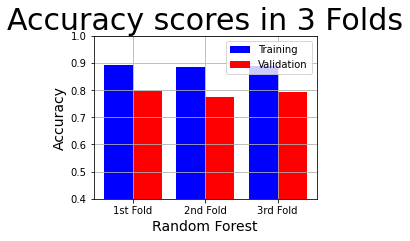

In [24]:
# Plot Accuracy Result
model_name = "Random Forest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            random_forest_results["Training Accuracy scores"],
            random_forest_results["Validation Accuracy scores"])

In [25]:
# Calculatin the MSE and accuracy in the training and test

# Train
y_train_predict = random_forest.predict(x_train)
y_train_true = y_train
# MSE
mse_train = mean_squared_error(y_train_true, y_train_predict)
print(f'MSE Train: {mse_train}')
# Accuracy
acc_train = accuracy_score(y_train_true, y_train_predict, normalize=True)
print(f'Accuracy Train: {acc_train}')

# Test
y_test_predict = random_forest.predict(x_test)
y_test_true = y_test
# MSE
mse_test = mean_squared_error(y_test_true, y_test_predict)
print(f'MSE Test: {mse_test}')
# Accuracy
acc_test = accuracy_score(y_test_true, y_test_predict, normalize=True)
print(f'Accuracy Test: {acc_test}')


MSE Train: 0.1320219022510647
Accuracy Train: 0.8679780977489353
MSE Test: 0.20928030303030304
Accuracy Test: 0.790719696969697


### **Exporting the model**
****

In [15]:
if smote:
    dump(random_forest, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/random_forest/random_forest_model_smote.joblib")
else:
    dump(random_forest, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/random_forest/random_forest_model.joblib")